Install & Imports

In [24]:
!pip install scikit-fuzzy --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import skfuzzy as fuzz
from skfuzzy import control as ctrl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

pd.set_option("display.max_columns", None)


Load Dataset

In [25]:
# If Excel
df = pd.read_excel("/content/healthy_lifestyle_dataset.xlsx")

print("Shape:", df.shape)
display(df.head())
print(df.columns)


Shape: (3000, 22)


,Age,Sleep_Duration_Hours,Meal_Type,Height_cm,Weight_kg,BMI,Bilirubin_Issue,Gastric_Problem,Dinner_to_Bed_Gap_Hours,Physical_Activity_Min_Per_Day,Water_Intake_Liters,Stress_Level_1to5,Screen_Time_Hours,Smoking_Status,Alcohol_Intake_Frequency,Chronic_Disease_Flag,Work_Hours_Per_Day,Step_Count_Per_Day,Fruit_Veg_Servings_Per_Day,Coffee_Cups_Per_Day,Processed_Food_Frequency_Per_Week,Lifestyle_Score
0,56,8.3,High Protein,164.3,70.6,26.2,No,Yes,2.6,112,1.9,5,5.4,Regular,Weekly,1,10.2,11073,5,3,5,18.2
1,69,5.8,Rice-based,165.3,80.4,29.4,No,Yes,3.3,21,1.6,4,3.0,Occasional,Weekly,1,8.6,3697,4,2,1,4.9
2,46,8.8,High Protein,163.1,91.1,34.2,No,Yes,1.0,19,2.4,5,5.1,Non-smoker,Monthly,1,9.1,13841,3,1,6,0.5
3,32,6.8,Roti-based,177.1,56.6,18.0,Yes,Yes,4.2,96,3.0,4,6.2,Occasional,Monthly,1,8.6,15236,1,4,6,18.9
4,60,8.3,Fast Food,152.6,80.9,34.7,No,Yes,3.0,4,2.2,4,6.9,Occasional,NaN,0,6.5,1952,1,2,1,0.0


Index(['Age', 'Sleep_Duration_Hours', 'Meal_Type', 'Height_cm', 'Weight_kg',
       'BMI', 'Bilirubin_Issue', 'Gastric_Problem', 'Dinner_to_Bed_Gap_Hours',
       'Physical_Activity_Min_Per_Day', 'Water_Intake_Liters',
       'Stress_Level_1to5', 'Screen_Time_Hours', 'Smoking_Status',
       'Alcohol_Intake_Frequency', 'Chronic_Disease_Flag',
       'Work_Hours_Per_Day', 'Step_Count_Per_Day',
       'Fruit_Veg_Servings_Per_Day', 'Coffee_Cups_Per_Day',
       'Processed_Food_Frequency_Per_Week', 'Lifestyle_Score'],
      dtype='object')


EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                3000 non-null   int64  
 1   Sleep_Duration_Hours               3000 non-null   float64
 2   Meal_Type                          3000 non-null   object 
 3   Height_cm                          3000 non-null   float64
 4   Weight_kg                          3000 non-null   float64
 5   BMI                                3000 non-null   float64
 6   Bilirubin_Issue                    3000 non-null   object 
 7   Gastric_Problem                    3000 non-null   object 
 8   Dinner_to_Bed_Gap_Hours            3000 non-null   float64
 9   Physical_Activity_Min_Per_Day      3000 non-null   int64  
 10  Water_Intake_Liters                3000 non-null   float64
 11  Stress_Level_1to5                  3000 non-null   int64

,Age,Sleep_Duration_Hours,Height_cm,Weight_kg,BMI,Dinner_to_Bed_Gap_Hours,Physical_Activity_Min_Per_Day,Water_Intake_Liters,Stress_Level_1to5,Screen_Time_Hours,Chronic_Disease_Flag,Work_Hours_Per_Day,Step_Count_Per_Day,Fruit_Veg_Servings_Per_Day,Coffee_Cups_Per_Day,Processed_Food_Frequency_Per_Week,Lifestyle_Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,43.563000,6.983633,165.069100,68.006800,25.234333,2.534500,60.968000,2.520367,3.006000,5.015600,0.493667,7.986067,8523.494333,3.523333,2.963333,3.439667,13.704867
std,14.941791,1.432054,9.973753,11.411006,5.245139,0.973366,35.114964,0.686770,1.414201,1.962745,0.500043,1.942329,4361.684276,2.283826,1.998663,2.265407,6.654727
min,18.000000,4.000000,145.000000,45.000000,12.500000,0.500000,0.000000,0.500000,1.000000,1.000000,0.000000,4.000000,1005.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,6.000000,158.000000,60.100000,21.400000,1.900000,31.000000,2.000000,2.000000,3.600000,0.000000,6.600000,4787.750000,2.000000,1.000000,1.000000,9.000000
50%,44.000000,7.000000,164.900000,67.900000,24.900000,2.500000,61.000000,2.500000,3.000000,5.000000,0.000000,8.000000,8422.500000,4.000000,3.000000,3.000000,13.800000
75%,56.000000,8.000000,172.000000,75.700000,28.600000,3.200000,92.000000,3.000000,4.000000,6.400000,1.000000,9.300000,12383.250000,5.000000,5.000000,5.000000,18.300000
max,69.000000,10.000000,190.000000,108.500000,45.500000,5.000000,120.000000,4.700000,5.000000,10.000000,1.000000,14.000000,15996.000000,7.000000,6.000000,7.000000,34.500000


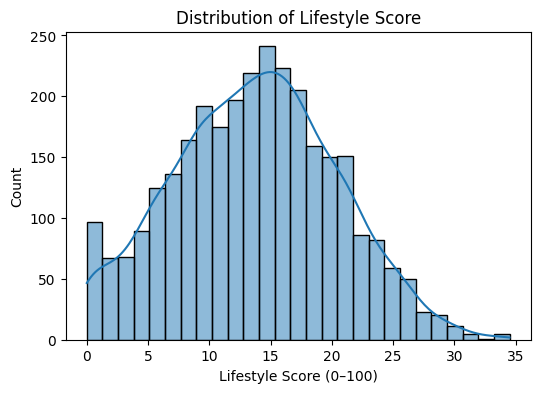

In [26]:
print(df.info())
display(df.describe())

plt.figure(figsize=(6,4))
sns.histplot(df["Lifestyle_Score"], kde=True)
plt.title("Distribution of Lifestyle Score")
plt.xlabel("Lifestyle Score (0–100)")
plt.show()


Feature Engineering

In [28]:
df = df.copy()

# Recompute BMI
df["Height_m"] = df["Height_cm"] / 100.0
df["BMI"] = df["Weight_kg"] / (df["Height_m"] ** 2)

# Binary flags for fuzzy + NN
df["Bilirubin_Flag"] = df["Bilirubin_Issue"].map({"No": 0, "Yes": 1})
df["Gastric_Flag"]   = df["Gastric_Problem"].map({"No": 0, "Yes": 1})

# Meal quality for fuzzy system
meal_quality_map = {
    "Fast Food": 0,
    "Rice-based": 1,
    "Roti-based": 1,
    "Mixed Veg": 2,
    "High Protein": 3
}
df["Meal_Quality"] = df["Meal_Type"].map(meal_quality_map)

# One-hot encode categorical variables for NN
df_nn = pd.get_dummies(
    df,
    columns=["Meal_Type", "Smoking_Status", "Alcohol_Intake_Frequency"],
    drop_first=True
)

feature_cols = [
    "Age",
    "Sleep_Duration_Hours",
    "Dinner_to_Bed_Gap_Hours",
    "Height_cm",
    "Weight_kg",
    "BMI",
    "Physical_Activity_Min_Per_Day",
    "Water_Intake_Liters",
    "Stress_Level_1to5",
    "Screen_Time_Hours",
    "Bilirubin_Flag",
    "Gastric_Flag",
    "Chronic_Disease_Flag",
    "Work_Hours_Per_Day",
    "Step_Count_Per_Day",
    "Fruit_Veg_Servings_Per_Day",
    "Coffee_Cups_Per_Day",
    "Processed_Food_Frequency_Per_Week",
] + [c for c in df_nn.columns if c.startswith("Meal_Type_")
     or c.startswith("Smoking_Status_")
     or c.startswith("Alcohol_Intake_Frequency_")]

X = df_nn[feature_cols].values
print("Input feature matrix shape:", X.shape)


Input feature matrix shape: (3000, 26)


Fuzzy Variables + Membership Functions

In [29]:
# Antecedents (inputs) – labels MUST match df column names
age      = ctrl.Antecedent(np.arange(15, 81, 1),  'Age')
sleep    = ctrl.Antecedent(np.arange(4, 11, 0.1), 'Sleep_Duration_Hours')
gap      = ctrl.Antecedent(np.arange(0, 6, 0.1),  'Dinner_to_Bed_Gap_Hours')
bmi      = ctrl.Antecedent(np.arange(15, 41, 0.1),'BMI')
meal_q   = ctrl.Antecedent(np.arange(-0.5, 3.6, 0.1), 'Meal_Quality')
activity = ctrl.Antecedent(np.arange(0, 121, 1), 'Physical_Activity_Min_Per_Day')
water    = ctrl.Antecedent(np.arange(0, 5.5, 0.1),'Water_Intake_Liters')
stress   = ctrl.Antecedent(np.arange(1, 5.1, 0.1),'Stress_Level_1to5')
screen   = ctrl.Antecedent(np.arange(0, 11, 0.1),'Screen_Time_Hours')
bili     = ctrl.Antecedent(np.arange(-0.1, 1.1, 0.1),'Bilirubin_Flag')
gastric  = ctrl.Antecedent(np.arange(-0.1, 1.1, 0.1),'Gastric_Flag')

# Consequent (output) – INTERNAL NAME = 'Lifestyle_Score_Fuzzy'
lifestyle_fuzzy = ctrl.Consequent(np.arange(0, 101, 1), 'Lifestyle_Score_Fuzzy')

# ---- Age ----
age['young']  = fuzz.trapmf(age.universe,  [15, 15, 25, 35])
age['middle'] = fuzz.trimf(age.universe,   [30, 40, 55])
age['old']    = fuzz.trapmf(age.universe,  [50, 60, 80, 80])

# ---- Sleep ----
sleep['poor']      = fuzz.trapmf(sleep.universe, [4, 4, 5, 6])
sleep['normal']    = fuzz.trimf(sleep.universe,  [6, 7.5, 9])
sleep['excellent'] = fuzz.trapmf(sleep.universe, [8, 9, 10, 10])

# ---- Dinner-to-bed gap ----
gap['short'] = fuzz.trapmf(gap.universe, [0, 0, 1, 2])
gap['ok']    = fuzz.trimf(gap.universe,  [2, 3, 4])
gap['long']  = fuzz.trapmf(gap.universe, [4, 4.5, 5, 5])

# ---- BMI ----
bmi['under']  = fuzz.trapmf(bmi.universe, [15, 15, 18, 19])
bmi['normal'] = fuzz.trimf(bmi.universe,  [19, 22, 25])
bmi['over']   = fuzz.trimf(bmi.universe,  [25, 28, 30])
bmi['obese']  = fuzz.trapmf(bmi.universe, [30, 32, 40, 40])

# ---- Meal quality ----
meal_q['poor'] = fuzz.trapmf(meal_q.universe, [-0.5, -0.5, 0, 1])
meal_q['avg']  = fuzz.trimf(meal_q.universe,  [0.8, 1.5, 2.2])
meal_q['good'] = fuzz.trapmf(meal_q.universe, [2, 2.5, 3.5, 3.5])

# ---- Physical activity ----
activity['low']  = fuzz.trapmf(activity.universe, [0, 0, 20, 40])
activity['med']  = fuzz.trimf(activity.universe,  [30, 60, 90])
activity['high'] = fuzz.trapmf(activity.universe, [80, 100, 120, 120])

# ---- Water intake ----
water['low']  = fuzz.trapmf(water.universe, [0, 0, 1.5, 2.0])
water['ok']   = fuzz.trimf(water.universe,  [1.8, 2.5, 3.5])
water['high'] = fuzz.trapmf(water.universe, [3.2, 4.0, 5.5, 5.5])

# ---- Stress ----
stress['low']  = fuzz.trapmf(stress.universe, [1, 1, 1.5, 2.5])
stress['med']  = fuzz.trimf(stress.universe,  [2, 3, 4])
stress['high'] = fuzz.trapmf(stress.universe, [3.5, 4, 5, 5])

# ---- Screen time ----
screen['low']  = fuzz.trapmf(screen.universe, [0, 0, 2, 3])
screen['med']  = fuzz.trimf(screen.universe,  [2.5, 5, 7])
screen['high'] = fuzz.trapmf(screen.universe, [6, 8, 10, 10])

# ---- Bilirubin flag ----
bili['no']  = fuzz.trapmf(bili.universe, [-0.1, -0.1, 0, 0.3])
bili['yes'] = fuzz.trapmf(bili.universe, [0.7, 1, 1.1, 1.1])

# ---- Gastric flag ----
gastric['no']  = fuzz.trapmf(gastric.universe, [-0.1, -0.1, 0, 0.3])
gastric['yes'] = fuzz.trapmf(gastric.universe, [0.7, 1, 1.1, 1.1])

# ---- Output lifestyle fuzzy MFs ----
lifestyle_fuzzy['very_low']  = fuzz.trapmf(lifestyle_fuzzy.universe, [0, 0, 20, 35])
lifestyle_fuzzy['low']       = fuzz.trimf(lifestyle_fuzzy.universe,  [25, 35, 50])
lifestyle_fuzzy['medium']    = fuzz.trimf(lifestyle_fuzzy.universe,  [45, 55, 70])
lifestyle_fuzzy['high']      = fuzz.trimf(lifestyle_fuzzy.universe,  [65, 80, 90])
lifestyle_fuzzy['excellent'] = fuzz.trapmf(lifestyle_fuzzy.universe, [85, 90, 100, 100])


PRINT ALL FUZZY VARIABLES & THEIR TERMS

In [30]:
# ---------------------------------------------------------
# PRINT FUZZY VARIABLES & THEIR LINGUISTIC TERMS
# ---------------------------------------------------------

fuzzy_vars = [
    age, sleep, gap, bmi, meal_q, activity,
    water, stress, screen, bili, gastric,
    lifestyle_fuzzy
]

print("\n=========== FUZZY VARIABLES & TERMS ===========\n")

for var in fuzzy_vars:
    print(f"Fuzzy Variable: {var.label}")
    print("Terms:", list(var.terms.keys()))
    print("-" * 50)


=========== FUZZY VARIABLES & TERMS ===========

Fuzzy Variable: Age
Terms: ['young', 'middle', 'old']
--------------------------------------------------
Fuzzy Variable: Sleep_Duration_Hours
Terms: ['poor', 'normal', 'excellent']
--------------------------------------------------
Fuzzy Variable: Dinner_to_Bed_Gap_Hours
Terms: ['short', 'ok', 'long']
--------------------------------------------------
Fuzzy Variable: BMI
Terms: ['under', 'normal', 'over', 'obese']
--------------------------------------------------
Fuzzy Variable: Meal_Quality
Terms: ['poor', 'avg', 'good']
--------------------------------------------------
Fuzzy Variable: Physical_Activity_Min_Per_Day
Terms: ['low', 'med', 'high']
--------------------------------------------------
Fuzzy Variable: Water_Intake_Liters
Terms: ['low', 'ok', 'high']
--------------------------------------------------
Fuzzy Variable: Stress_Level_1to5
Terms: ['low', 'med', 'high']
--------------------------------------------------
Fuzzy Variab

PRINT MEMBERSHIP FUNCTION NUMERIC RANGES

In [31]:
# ---------------------------------------------------------
# PRINT FUZZY VARIABLE UNIVERSE RANGES
# ---------------------------------------------------------

print("\n=========== FUZZY VARIABLE RANGES ===========\n")

for var in fuzzy_vars:
    print(f"{var.label} Range: {var.universe.min()}  to  {var.universe.max()}")


=========== FUZZY VARIABLE RANGES ===========

Age Range: 15  to  80
Sleep_Duration_Hours Range: 4.0  to  10.899999999999975
Dinner_to_Bed_Gap_Hours Range: 0.0  to  5.9
BMI Range: 15.0  to  40.899999999999906
Meal_Quality Range: -0.5  to  3.499999999999999
Physical_Activity_Min_Per_Day Range: 0  to  120
Water_Intake_Liters Range: 0.0  to  5.4
Stress_Level_1to5 Range: 1.0  to  5.0000000000000036
Screen_Time_Hours Range: 0.0  to  10.9
Bilirubin_Flag Range: -0.1  to  1.1
Gastric_Flag Range: -0.1  to  1.1
Lifestyle_Score_Fuzzy Range: 0  to  100


View Membership Functions

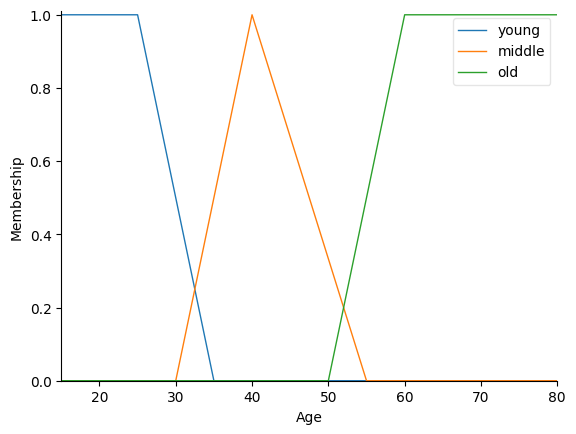

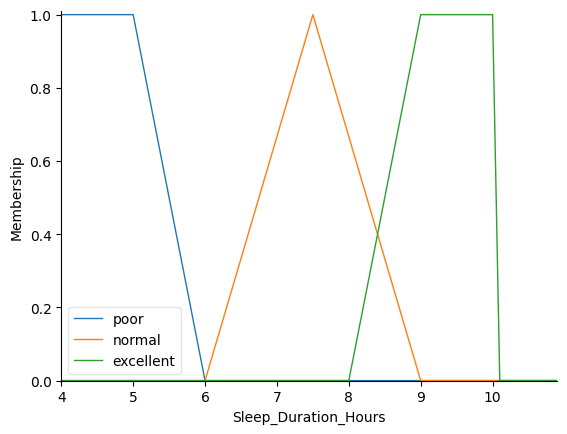

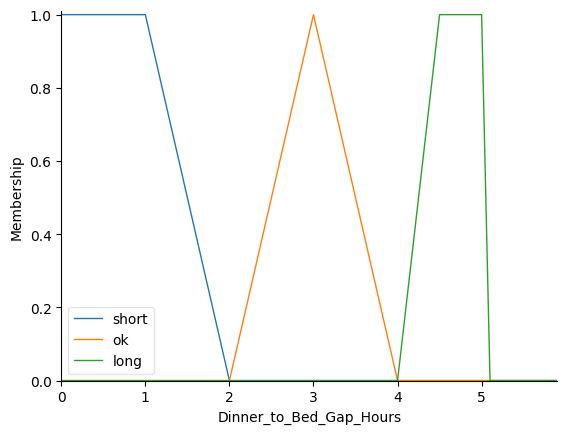

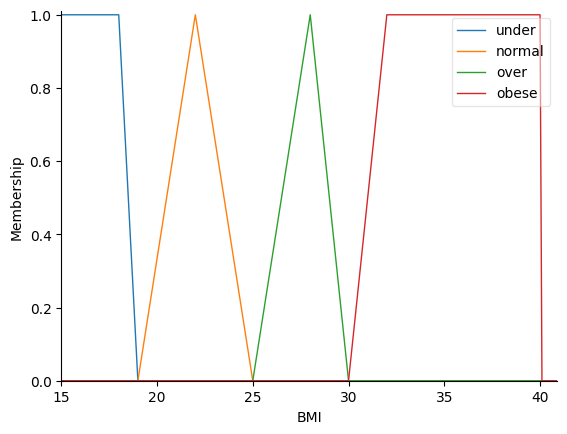

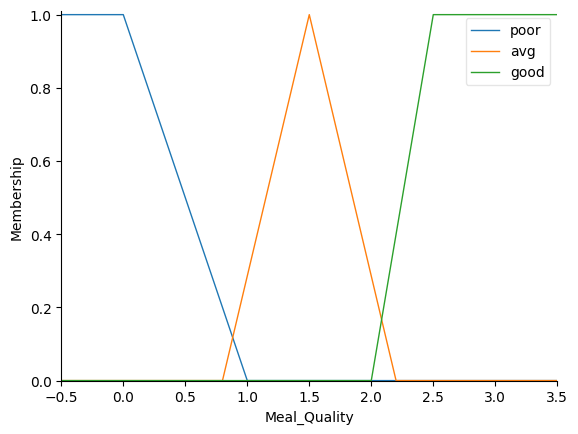

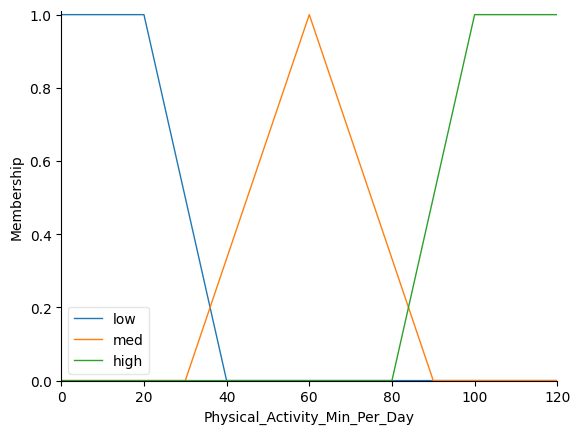

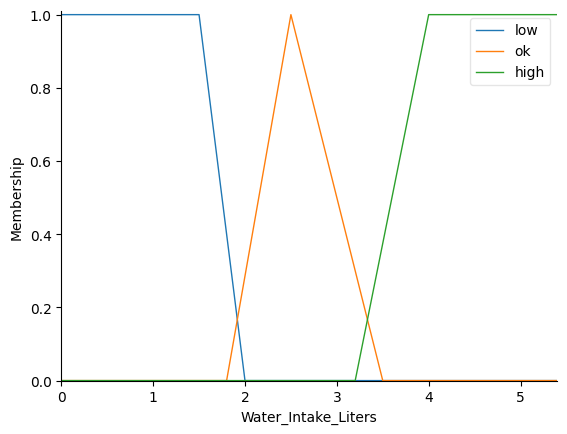

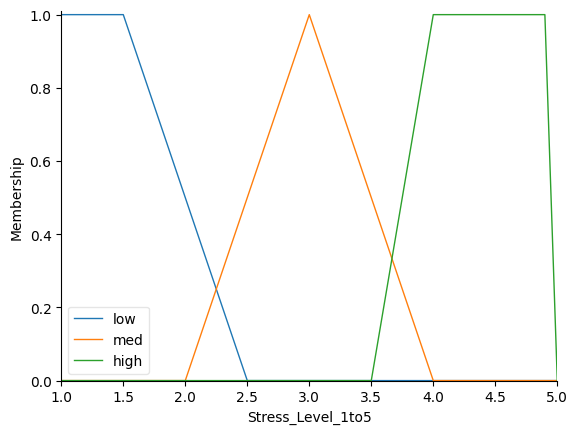

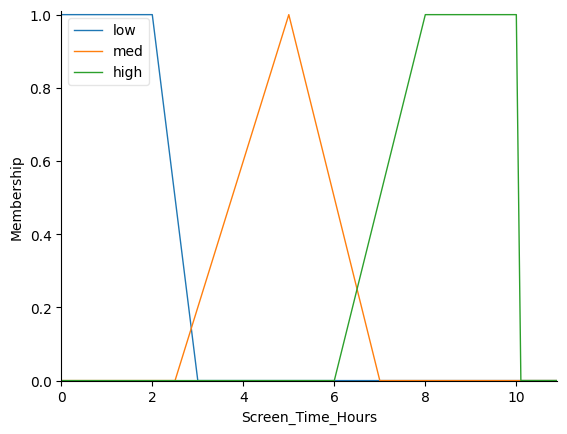

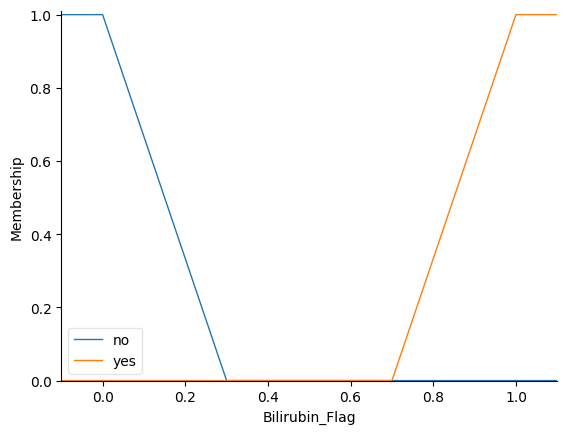

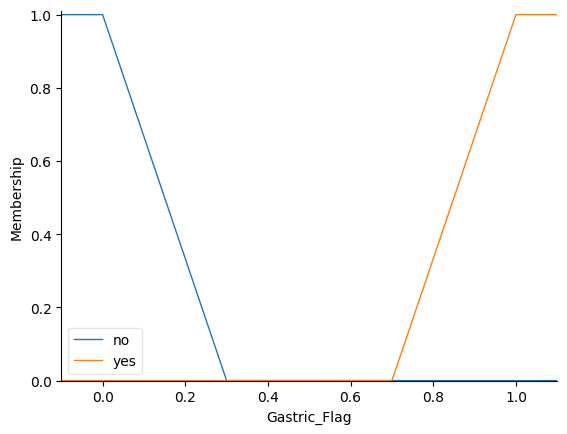

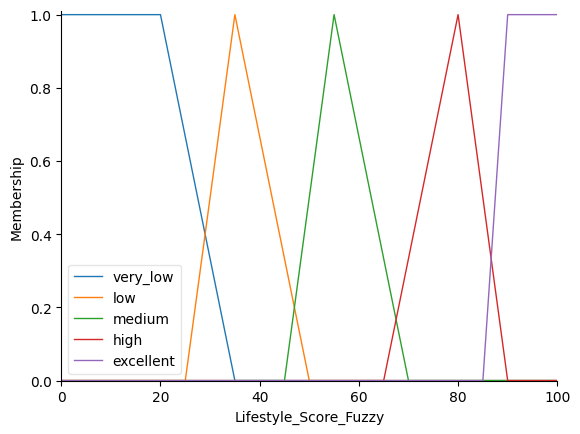

In [32]:
# ----------- VISUALIZE ALL MEMBERSHIP FUNCTIONS -----------

# Inputs
age.view(); plt.show()
sleep.view(); plt.show()
gap.view(); plt.show()
bmi.view(); plt.show()
meal_q.view(); plt.show()
activity.view(); plt.show()
water.view(); plt.show()
stress.view(); plt.show()
screen.view(); plt.show()
bili.view(); plt.show()
gastric.view(); plt.show()

# Output
lifestyle_fuzzy.view(); plt.show()


Fuzzy Rules & Control System

In [33]:

rule1 = ctrl.Rule(
    sleep['poor'] & stress['high'] & activity['low'],
    lifestyle_fuzzy['very_low']
)

rule2 = ctrl.Rule(
    meal_q['poor'] & gap['short'] & gastric['yes'],
    lifestyle_fuzzy['low']
)

rule3 = ctrl.Rule(
    bmi['normal'] & meal_q['good'] & activity['high'] & sleep['normal'],
    lifestyle_fuzzy['high']
)

rule4 = ctrl.Rule(
    sleep['excellent'] & water['high'] & stress['low'] & screen['low'],
    lifestyle_fuzzy['excellent']
)

rule5 = ctrl.Rule(
    bmi['obese'] & screen['high'] & activity['low'],
    lifestyle_fuzzy['low']
)

rule6 = ctrl.Rule(
    (bili['yes'] | gastric['yes']) & stress['high'],
    lifestyle_fuzzy['very_low']
)

rule7 = ctrl.Rule(
    sleep['normal'] & meal_q['avg'] & activity['med'] & stress['med'],
    lifestyle_fuzzy['medium']
)

rule8 = ctrl.Rule(
    age['old'] & bmi['obese'],
    lifestyle_fuzzy['very_low']
)

lifestyle_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4,
    rule5, rule6, rule7, rule8
])



PRINT ALL FUZZY RULES IN SIMPLE TEXT FORM



In [34]:
# ---------------------------------------------------------
# PRINT ALL FUZZY RULES
# ---------------------------------------------------------

print("\n=========== FUZZY RULE BASE ===========\n")

for i, rule in enumerate(lifestyle_ctrl.rules, start=1):
    print(f"Rule {i}:")
    print(rule)
    print("-" * 60)


=========== FUZZY RULE BASE ===========

Rule 1:
IF (Sleep_Duration_Hours[poor] AND Stress_Level_1to5[high]) AND Physical_Activity_Min_Per_Day[low] THEN Lifestyle_Score_Fuzzy[very_low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
------------------------------------------------------------
Rule 2:
IF (Meal_Quality[poor] AND Dinner_to_Bed_Gap_Hours[short]) AND Gastric_Flag[yes] THEN Lifestyle_Score_Fuzzy[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
------------------------------------------------------------
Rule 3:
IF ((BMI[normal] AND Meal_Quality[good]) AND Physical_Activity_Min_Per_Day[high]) AND Sleep_Duration_Hours[normal] THEN Lifestyle_Score_Fuzzy[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
------------------------------------------------------------
Rule 4:
IF ((Sleep_Duration_Hours[excellent] AND Water_Intake_Liters[high]) AND Stress_Level_1to5[low]) AND Screen_Time_Hours[low] THEN Lifestyle_Score_Fuzz

PRINT FUZZIFICATION VALUES FOR ONE SAMPLE

In [35]:
# ---------------------------------------------------------
# PRINT FUZZIFICATION VALUES FOR ONE SAMPLE
# ---------------------------------------------------------

sample_index = 0
row = df.iloc[sample_index]

sim = ctrl.ControlSystemSimulation(lifestyle_ctrl)

sim.input['Age']                           = row['Age']
sim.input['Sleep_Duration_Hours']          = row['Sleep_Duration_Hours']
sim.input['Dinner_to_Bed_Gap_Hours']       = row['Dinner_to_Bed_Gap_Hours']
sim.input['BMI']                           = row['BMI']
sim.input['Meal_Quality']                  = row['Meal_Quality']
sim.input['Physical_Activity_Min_Per_Day'] = row['Physical_Activity_Min_Per_Day']
sim.input['Water_Intake_Liters']           = row['Water_Intake_Liters']
sim.input['Stress_Level_1to5']             = row['Stress_Level_1to5']
sim.input['Screen_Time_Hours']             = row['Screen_Time_Hours']
sim.input['Bilirubin_Flag']                = row['Bilirubin_Flag']
sim.input['Gastric_Flag']                  = row['Gastric_Flag']

print("\n=========== FUZZIFICATION VALUES (Membership Degrees) ===========\n")

for var in [age, sleep, gap, bmi, meal_q, activity, water, stress, screen, bili, gastric]:
    print(f"\n{var.label}:")
    for term in var.terms:
        membership = fuzz.interp_membership(
            var.universe, var[term].mf, row[var.label]
        )
        print(f"  {term} → {membership:.3f}")


=========== FUZZIFICATION VALUES (Membership Degrees) ===========


Age:
  young → 0.000
  middle → 0.000
  old → 0.600

Sleep_Duration_Hours:
  poor → 0.000
  normal → 0.467
  excellent → 0.300

Dinner_to_Bed_Gap_Hours:
  short → 0.000
  ok → 0.600
  long → 0.000

BMI:
  under → 0.000
  normal → 0.000
  over → 0.384
  obese → 0.000

Meal_Quality:
  poor → 0.000
  avg → 0.000
  good → 1.000

Physical_Activity_Min_Per_Day:
  low → 0.000
  med → 0.000
  high → 1.000

Water_Intake_Liters:
  low → 0.200
  ok → 0.143
  high → 0.000

Stress_Level_1to5:
  low → 0.000
  med → 0.000
  high → 0.000

Screen_Time_Hours:
  low → 0.000
  med → 0.800
  high → 0.000

Bilirubin_Flag:
  no → 1.000
  yes → 0.000

Gastric_Flag:
  no → 0.000
  yes → 1.000


PRINT RULE FIRING STRENGTHS

In [36]:
# ---------------------------------------------------------
# PRINT RULE FIRING STRENGTHS
# ---------------------------------------------------------

sim.compute()

print("\n=========== RULE FIRING STRENGTHS ===========\n")

for i, rule in enumerate(lifestyle_ctrl.rules, start=1):
    print(f"Rule {i} firing strength: {rule.aggregate_firing[sim]:.4f}")


=========== RULE FIRING STRENGTHS ===========

Rule 1 firing strength: 0.0000
Rule 2 firing strength: 0.0000
Rule 3 firing strength: 0.0000
Rule 4 firing strength: 0.0000
Rule 5 firing strength: 0.0000
Rule 6 firing strength: 0.0000
Rule 7 firing strength: 0.0000
Rule 8 firing strength: 0.0000


Fuzzy Score + Explanation Function

In [38]:

def compute_fuzzy_score_and_explanation(row):
    sim = ctrl.ControlSystemSimulation(lifestyle_ctrl)

    # Inputs
    sim.input['Age']                           = row['Age']
    sim.input['Sleep_Duration_Hours']          = row['Sleep_Duration_Hours']
    sim.input['Dinner_to_Bed_Gap_Hours']       = row['Dinner_to_Bed_Gap_Hours']
    sim.input['BMI']                           = row['BMI']
    sim.input['Meal_Quality']                  = row['Meal_Quality']
    sim.input['Physical_Activity_Min_Per_Day'] = row['Physical_Activity_Min_Per_Day']
    sim.input['Water_Intake_Liters']           = row['Water_Intake_Liters']
    sim.input['Stress_Level_1to5']             = row['Stress_Level_1to5']
    sim.input['Screen_Time_Hours']             = row['Screen_Time_Hours']
    sim.input['Bilirubin_Flag']                = row['Bilirubin_Flag']
    sim.input['Gastric_Flag']                  = row['Gastric_Flag']

    # Run fuzzy inference
    sim.compute()

    out_keys = list(sim.output.keys())
    if len(out_keys) == 0:
        score = np.nan
    else:
        score = sim.output[out_keys[0]]

    # Build explanation based on crisp input values
    reasons = []
    if row['Sleep_Duration_Hours'] < 6:
        reasons.append("short sleep")
    if row['Dinner_to_Bed_Gap_Hours'] < 2:
        reasons.append("short dinner–sleep gap")
    if row['BMI'] >= 30:
        reasons.append("high BMI (obesity)")
    if row['Meal_Quality'] <= 0.5:
        reasons.append("unhealthy / fast food pattern")
    if row['Physical_Activity_Min_Per_Day'] < 30:
        reasons.append("low physical activity")
    if row['Water_Intake_Liters'] < 2:
        reasons.append("low water intake")
    if row['Stress_Level_1to5'] >= 4:
        reasons.append("high stress")
    if row['Screen_Time_Hours'] >= 7:
        reasons.append("high screen time")
    if row['Bilirubin_Flag'] == 1:
        reasons.append("bilirubin issue")
    if row['Gastric_Flag'] == 1:
        reasons.append("gastric problem")

    explanation = (
        "Low score factors: " + ", ".join(reasons)
        if reasons else
        "Healthy lifestyle pattern."
    )

    return score, explanation


# ---- Apply to whole dataset ----
fuzzy_scores = []
explanations = []

for _, r in df.iterrows():
    s, e = compute_fuzzy_score_and_explanation(r)
    fuzzy_scores.append(s)
    explanations.append(e)

df["Fuzzy_Lifestyle_Score"] = fuzzy_scores
df["Fuzzy_Explanation"] = explanations

df[["Lifestyle_Score", "Fuzzy_Lifestyle_Score", "Fuzzy_Explanation"]].head()


,Lifestyle_Score,Fuzzy_Lifestyle_Score,Fuzzy_Explanation
0,18.2,17.500000,"Low score factors: low water intake, high stre..."
1,4.9,14.090909,"Low score factors: short sleep, low physical a..."
2,0.5,17.500000,"Low score factors: short dinner–sleep gap, hig..."
3,18.9,14.090909,"Low score factors: high stress, bilirubin issu..."
4,0.0,19.015601,"Low score factors: high BMI (obesity), unhealt..."


Correlation of key features with Lifestyle_Score

In [39]:

corr_cols = [
    "Lifestyle_Score",
    "Fuzzy_Lifestyle_Score",
    "Sleep_Duration_Hours",
    "BMI",
    "Physical_Activity_Min_Per_Day",
    "Water_Intake_Liters",
    "Stress_Level_1to5",
    "Screen_Time_Hours",
    "Fruit_Veg_Servings_Per_Day",
]

corr_table = df[corr_cols].corr().round(2)
corr_table


,Lifestyle_Score,Fuzzy_Lifestyle_Score,Sleep_Duration_Hours,BMI,Physical_Activity_Min_Per_Day,Water_Intake_Liters,Stress_Level_1to5,Screen_Time_Hours,Fruit_Veg_Servings_Per_Day
Lifestyle_Score,1.00,0.38,0.29,-0.26,0.71,0.15,-0.43,-0.17,0.27
Fuzzy_Lifestyle_Score,0.38,1.00,0.11,-0.19,0.11,0.09,-0.56,-0.03,0.03
Sleep_Duration_Hours,0.29,0.11,1.00,0.02,0.02,0.02,0.01,-0.02,-0.00
BMI,-0.26,-0.19,0.02,1.00,-0.01,-0.03,0.01,-0.02,0.01
Physical_Activity_Min_Per_Day,0.71,0.11,0.02,-0.01,1.00,0.01,-0.03,-0.02,-0.02
Water_Intake_Liters,0.15,0.09,0.02,-0.03,0.01,1.00,-0.00,-0.02,-0.03
Stress_Level_1to5,-0.43,-0.56,0.01,0.01,-0.03,-0.00,1.00,-0.01,-0.01
Screen_Time_Hours,-0.17,-0.03,-0.02,-0.02,-0.02,-0.02,-0.01,1.00,-0.01
Fruit_Veg_Servings_Per_Day,0.27,0.03,-0.00,0.01,-0.02,-0.03,-0.01,-0.01,1.00


Dataset Score vs Fuzzy Score

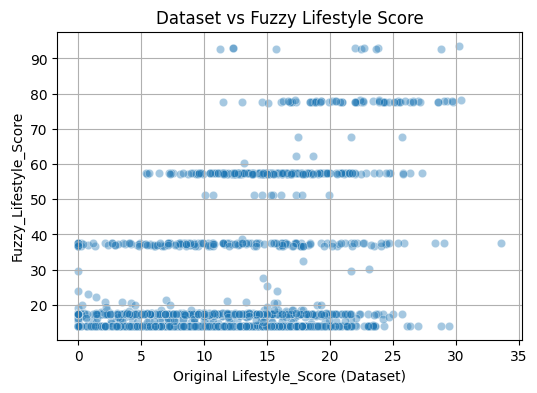

In [40]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Lifestyle_Score"], y=df["Fuzzy_Lifestyle_Score"], alpha=0.4)
plt.xlabel("Original Lifestyle_Score (Dataset)")
plt.ylabel("Fuzzy_Lifestyle_Score")
plt.title("Dataset vs Fuzzy Lifestyle Score")
plt.grid(True)
plt.show()


Fuzzy + ANN

In [44]:
# =========================================================
# BLOCK A: Fuzzy + ANN (Fuzzy_Lifestyle_Score as input)
# =========================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# 1) Attach fuzzy score to NN dataframe
assert "Fuzzy_Lifestyle_Score" in df.columns, "Run fuzzy block first."
df_nn["Fuzzy_Lifestyle_Score"] = df["Fuzzy_Lifestyle_Score"]

# 2) Feature list including fuzzy score
feature_cols_with_fuzzy = feature_cols + ["Fuzzy_Lifestyle_Score"]

# 3) Remove any rows with NaN in features or target (very important to avoid NaN loss)
valid_mask_fuzzy = (
    df_nn[feature_cols_with_fuzzy].notna().all(axis=1)
    & df["Lifestyle_Score"].notna()
)

df_fuzzy = df[valid_mask_fuzzy].copy()
df_nn_fuzzy = df_nn[valid_mask_fuzzy].copy()

# 4) Build X and y
X_fuzzy = df_nn_fuzzy[feature_cols_with_fuzzy].values
y_fuzzy = df_fuzzy["Lifestyle_Score"].values / 100.0  # scale 0–1

print("Fuzzy+ANN: X shape =", X_fuzzy.shape, " y shape =", y_fuzzy.shape)

# 5) Train–test split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_fuzzy, y_fuzzy, test_size=0.2, random_state=42
)

# 6) Scaling
scaler_fuzzy = StandardScaler()
Xf_train_scaled = scaler_fuzzy.fit_transform(Xf_train)
Xf_test_scaled  = scaler_fuzzy.transform(Xf_test)

print("Any NaN in Xf_train_scaled?", np.isnan(Xf_train_scaled).any())
print("Any NaN in yf_train?", np.isnan(yf_train).any())

# 7) Build and train model
model_fuzzy = keras.Sequential([
    layers.Input(shape=(Xf_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="linear")
])

model_fuzzy.compile(optimizer="adam", loss="mse", metrics=["mae"])

early_stop_fuzzy = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history_fuzzy = model_fuzzy.fit(
    Xf_train_scaled, yf_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop_fuzzy],
    verbose=1
)

# 8) Evaluation
test_loss_fuzzy, test_mae_fuzzy = model_fuzzy.evaluate(Xf_test_scaled, yf_test, verbose=0)
print("Fuzzy+ANN Test MSE:", test_loss_fuzzy)
print("Fuzzy+ANN Test MAE (0–1):", test_mae_fuzzy)
print("Fuzzy+ANN Test MAE in score points:", test_mae_fuzzy * 100)
print("Fuzzy+ANN Epochs actually run:", len(history_fuzzy.history["loss"]))


Fuzzy+ANN: X shape = (1543, 27)  y shape = (1543,)
Any NaN in Xf_train_scaled? False
Any NaN in yf_train? False
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.1218 - mae: 0.2662 - val_loss: 0.0432 - val_mae: 0.1591
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0283 - mae: 0.1344 - val_loss: 0.0274 - val_mae: 0.1312
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0166 - mae: 0.1031 - val_loss: 0.0221 - val_mae: 0.1167
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0110 - mae: 0.0846 - val_loss: 0.0189 - val_mae: 0.1087
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0081 - mae: 0.0726 - val_loss: 0.0164 - val_mae: 0.1005
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0066 - mae: 0.0653 - val_loss: 0.0146 - val_mae: 0.0945
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mae: 0.0569 - val_loss: 0.0133 - val_mae: 0.0912
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.004

Direct ANN (no fuzzy score)

In [45]:
# =========================================================
# BLOCK B: Direct ANN on Original Features (no fuzzy score)
# =========================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# 1) Clean rows for direct ANN (only original feature_cols)
valid_mask_direct = (
    df_nn[feature_cols].notna().all(axis=1)
    & df["Lifestyle_Score"].notna()
)

df_direct = df[valid_mask_direct].copy()
df_nn_direct = df_nn[valid_mask_direct].copy()

# 2) Build X and y (without fuzzy feature)
X_direct = df_nn_direct[feature_cols].values
y_direct = df_direct["Lifestyle_Score"].values / 100.0

print("Direct ANN: X shape =", X_direct.shape, " y shape =", y_direct.shape)

# 3) Train–test split
Xd_train, Xd_test, yd_train, yd_test = train_test_split(
    X_direct, y_direct, test_size=0.2, random_state=42
)

# 4) Scaling
scaler_direct = StandardScaler()
Xd_train_scaled = scaler_direct.fit_transform(Xd_train)
Xd_test_scaled  = scaler_direct.transform(Xd_test)

print("Any NaN in Xd_train_scaled?", np.isnan(Xd_train_scaled).any())
print("Any NaN in yd_train?", np.isnan(yd_train).any())

# 5) Build and train model
model_direct = keras.Sequential([
    layers.Input(shape=(Xd_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="linear")
])

model_direct.compile(optimizer="adam", loss="mse", metrics=["mae"])

early_stop_direct = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

history_direct = model_direct.fit(
    Xd_train_scaled, yd_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop_direct],
    verbose=1
)

# 6) Evaluation
test_loss_direct, test_mae_direct = model_direct.evaluate(Xd_test_scaled, yd_test, verbose=0)
print("Direct ANN Test MSE:", test_loss_direct)
print("Direct ANN Test MAE (0–1):", test_mae_direct)
print("Direct ANN Test MAE in score points:", test_mae_direct * 100)
print("Direct ANN Epochs actually run:", len(history_direct.history["loss"]))


Direct ANN: X shape = (3000, 26)  y shape = (3000,)
Any NaN in Xd_train_scaled? False
Any NaN in yd_train? False
Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3171 - mae: 0.4294 - val_loss: 0.0514 - val_mae: 0.1795
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0388 - mae: 0.1570 - val_loss: 0.0321 - val_mae: 0.1422
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0247 - mae: 0.1250 - val_loss: 0.0234 - val_mae: 0.1203
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157 - mae: 0.0986 - val_loss: 0.0186 - val_mae: 0.1065
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mae: 0.0843 - val_loss: 0.0152 - val_mae: 0.0973
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - mae: 0.0729 - val_loss: 0.0129 - val_mae: 0.0892
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mae: 0.0678 - val_loss: 0.0114 - val_mae: 0.0842
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 

Training & Validation Curves (fuzzy+ann)

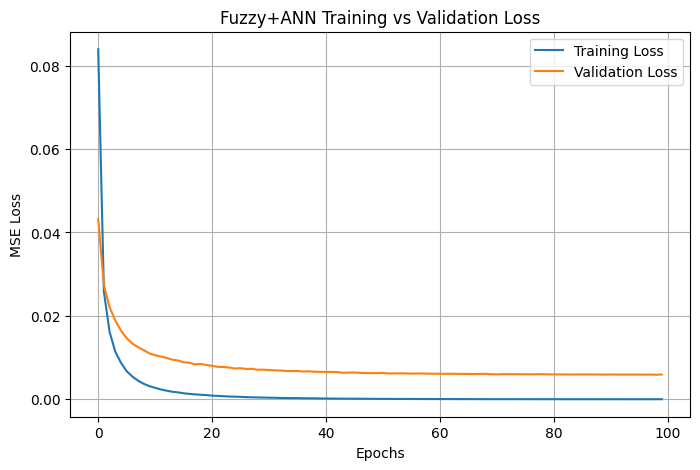

In [49]:
plt.figure(figsize=(8,5))
plt.plot(history_fuzzy.history["loss"], label="Training Loss")
plt.plot(history_fuzzy.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Fuzzy+ANN Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


Actual vs Predicted (fuzzy+ann)

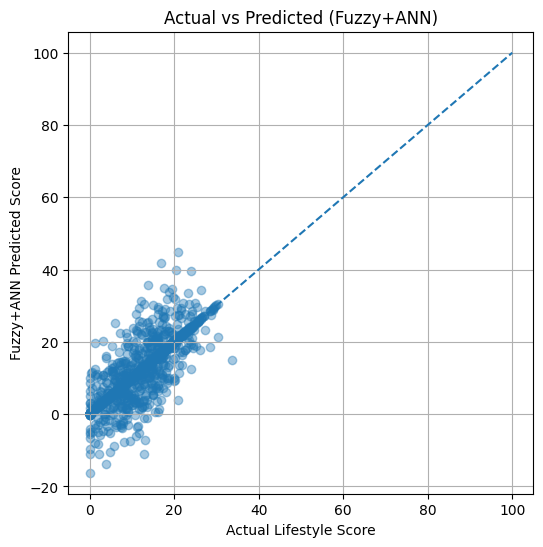

In [50]:
# Fuzzy+ANN Predictions
X_all_fuzzy = df_nn_fuzzy[feature_cols_with_fuzzy].values
X_all_fuzzy_scaled = scaler_fuzzy.transform(X_all_fuzzy)
y_pred_fuzzy_ann = model_fuzzy.predict(X_all_fuzzy_scaled, verbose=0).ravel() * 100

y_actual = df_fuzzy["Lifestyle_Score"].values

plt.figure(figsize=(6,6))
plt.scatter(y_actual, y_pred_fuzzy_ann, alpha=0.4)
plt.plot([0,100], [0,100], linestyle="--")
plt.xlabel("Actual Lifestyle Score")
plt.ylabel("Fuzzy+ANN Predicted Score")
plt.title("Actual vs Predicted (Fuzzy+ANN)")
plt.grid(True)
plt.show()


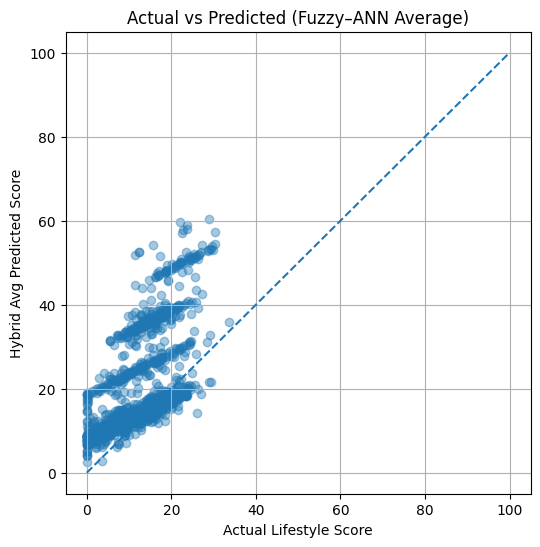

In [51]:
# Direct ANN Predictions
X_all_direct = df_nn[feature_cols].values
X_all_direct_scaled = scaler_direct.transform(X_all_direct)
y_pred_direct = model_direct.predict(X_all_direct_scaled, verbose=0).ravel() * 100

# Fuzzy Scores
fuzzy_scores = df["Fuzzy_Lifestyle_Score"].values

# Hybrid Average Predictions
y_pred_hybrid_avg = (fuzzy_scores + y_pred_direct) / 2

y_actual_avg = df["Lifestyle_Score"].values

plt.figure(figsize=(6,6))
plt.scatter(y_actual_avg, y_pred_hybrid_avg, alpha=0.4)
plt.plot([0,100], [0,100], linestyle="--")
plt.xlabel("Actual Lifestyle Score")
plt.ylabel("Hybrid Avg Predicted Score")
plt.title("Actual vs Predicted (Fuzzy–ANN Average)")
plt.grid(True)
plt.show()


Hybrid Prediction (Fuzzy + NN)

In [48]:
def hybrid_avg_predict(row_index):
    row = df.iloc[row_index]

    # ---------- Fuzzy Prediction ----------
    fuzzy_score, explanation = compute_fuzzy_score_and_explanation(row)

    # ---------- Direct ANN Prediction ----------
    x_vec = df_nn.iloc[[row_index]][feature_cols].values
    x_scaled = scaler_direct.transform(x_vec)

    nn_pred_norm = model_direct.predict(x_scaled, verbose=0)[0, 0]
    nn_score = float(nn_pred_norm * 100.0)

    # ---------- Hybrid Averaging ----------
    hybrid_score = (fuzzy_score + nn_score) / 2

    return fuzzy_score, nn_score, hybrid_score, explanation


# 🔹 Test on 5 samples
for i in range(5):
    fs, ns, hs, exp = hybrid_avg_predict(i)
    print(f"\nSample {i}")
    print(f"Fuzzy Score   : {fs:.2f}")
    print(f"NN Score      : {ns:.2f}")
    print(f"Hybrid Avg    : {hs:.2f}")
    print("Explanation  :", exp)


Sample 0
Fuzzy Score   : 17.50
NN Score      : 14.72
Hybrid Avg    : 16.11
Explanation  : Low score factors: low water intake, high stress, gastric problem

Sample 1
Fuzzy Score   : 14.09
NN Score      : 7.31
Hybrid Avg    : 10.70
Explanation  : Low score factors: short sleep, low physical activity, low water intake, high stress, gastric problem

Sample 2
Fuzzy Score   : 17.50
NN Score      : -0.07
Hybrid Avg    : 8.72
Explanation  : Low score factors: short dinner–sleep gap, high BMI (obesity), low physical activity, high stress, gastric problem

Sample 3
Fuzzy Score   : 14.09
NN Score      : 19.25
Hybrid Avg    : 16.67
Explanation  : Low score factors: high stress, bilirubin issue, gastric problem

Sample 4
Fuzzy Score   : 19.02
NN Score      : -0.54
Hybrid Avg    : 9.24
Explanation  : Low score factors: high BMI (obesity), unhealthy / fast food pattern, low physical activity, high stress, gastric problem


FUZZY+ANN vs HYBRID AVERAGE

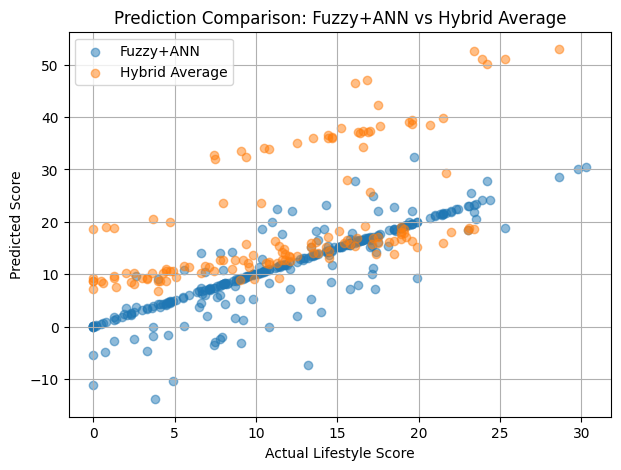

In [52]:
plt.figure(figsize=(7,5))
plt.scatter(y_actual[:300], y_pred_fuzzy_ann[:300], label="Fuzzy+ANN", alpha=0.5)
plt.scatter(y_actual_avg[:300], y_pred_hybrid_avg[:300], label="Hybrid Average", alpha=0.5)
plt.xlabel("Actual Lifestyle Score")
plt.ylabel("Predicted Score")
plt.title("Prediction Comparison: Fuzzy+ANN vs Hybrid Average")
plt.legend()
plt.grid(True)
plt.show()
